In [1]:
%load_ext autoreload
%autoreload 2
from dark_matters.input import read_input_file,read_dm_output
from dark_matters.calculations import run_calculation
from dark_matters.output import fits_map,make_output
from astropy import units
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt
import numpy as np 

In [2]:
data_sets = read_input_file("coma_diffSph.yaml")
print(data_sets)

{'halo_data': {'name': 'coma', 'profile': 'nfw', 'scale': np.float64(0.333), 'distance': np.float64(105.343), 'z': 0.023, 'mvir': np.float64(1240000000000000.0), 'rvir': np.float64(3.0)}, 'mag_data': {'mag_norm': np.float64(4.7), 'profile': 'flat', 'mag_func_lock': False}, 'gas_data': {'gas_norm': np.float64(0.01), 'profile': 'exp', 'scale': np.float64(1.5)}, 'diff_data': {'diff_constant': np.float64(3e+28), 'diff_index': 0.3333333333333333, 'diff_rmax': np.float64(6.0)}, 'part_data': {'em_model': 'annihilation', 'part_model': 'bb', 'cross_section': np.float64(3e-26)}, 'calc_data': {'os_max_steps': 20, 'calc_mode': 'sb', 'e_sample_number': 50, 'electron_mode': 'os-python', 'f_sample_limits': array([1.e+01, 1.e+06]), 'f_sample_num': 70, 'f_sample_spacing': 'log', 'freq_mode': 'radio', 'log10_r_sample_min_factor': -3, 'm_wimp': array([  10.,  100., 1000.]), 'r_sample_num': 51}, 'cosmo_data': {}}


In [3]:
output_data = run_calculation(**data_sets)

Beginning DarkMatters calculations
Frequency mode: radio
Calculation type: sb
Run Parameters
Frequency Samples: 70
Minimum Frequency Sampled: 1.00e+01 MHz (4.14e-17 GeV) 
Maximum Frequency Sampled: 1.00e+06 MHz (4.14e-12 GeV)
Radial Grid Intervals: 51
Minimum Sampled Radius: 3.33e-04 Mpc
Maximum Sampled Radius: 6.00e+00 Mpc
Halo Parameters: 
Halo Name: coma
Redshift z: 2.30e-02
Luminosity Distance: 1.05e+02 Mpc
Halo profile: nfw
Virial Mass: 1.24e+15 Solar Masses
Virial Radius: 3.00e+00 Mpc
Halo scale radius: 3.33e-01 Mpc
Rho_s/Rho_crit: 1.46e+04
Virial Concentration: 9.01
Gas Parameters: 
Gas density profile: exp
scale: 1.5 Mpc 
gas_norm: 0.01 cm^-3 
Magnetic Field Parameters: 
Magnetic field profile: flat
mag_norm: 4.7 micro-Gauss 
Spatial Diffusion
Turbulence index: 0.33
Diffusion constant: 3.00e+28 cm^2 s^-1
Now calculating for Dark Matter model: 
WIMP mass: 10.0 GeV
Particle physics: bb
Emission type: annihilation
Calculating Electron Equilibriumn Distributions
Solution via: OS me

{'electron_data': 'GeV/cm^3', 'radio_em_data': 'GeV/cm^3', 'primary_em_data': 'GeV/cm^3', 'secondary_em_data': 'GeV/cm^3', 'f_sample_values': 'MHz', 'final_data': 'Jy/arcmin^2', 'ang_sample_values': 'arcmin', 'r_sample_values': 'Mpc', 'e_sample_values': 'GeV'}


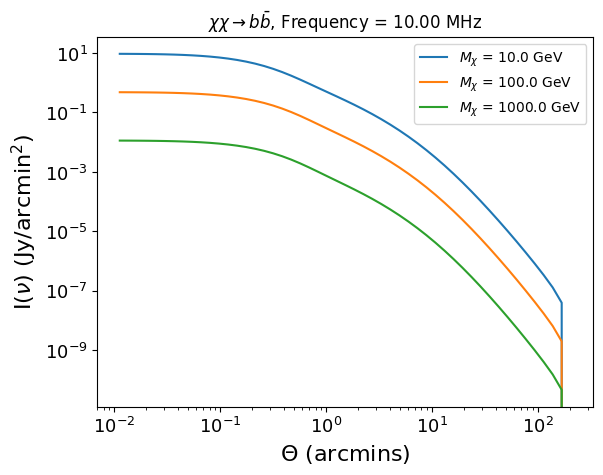

In [11]:
freq_index = (np.abs(output_data['calc_data']['results']['f_sample_values']- 10.0)).argmin()
print(output_data['calc_data']['results']['units'])
for i in range(len(output_data['calc_data']['m_wimp'])):
    plt.plot(output_data['calc_data']['results']['ang_sample_values'],np.array(output_data['calc_data']['results']['final_data'][i][freq_index])/11818102.86,label=r"$M_\chi$ = "+str(output_data['calc_data']['m_wimp'][i])+" GeV")
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"I$(\nu)$ (Jy/arcmin$^2$)",fontsize=16)
plt.xlabel(r"$\Theta$ (arcmins)",fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(r"$\chi \chi \rightarrow b \bar{b}$, "+f"Frequency = {output_data['calc_data']['results']['f_sample_values'][freq_index]:.2f} MHz")
plt.legend()
plt.show()